In [1]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller

In [2]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [3]:

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [4]:
cpi=pd.read_excel('ca_cpi.xlsx', parse_dates=['Date'], index_col='Date').sort_index()
fed_fund=pd.read_excel('ca_rate.xlsx',parse_dates=['Date'], index_col='Date').sort_index()
gdp=pd.read_excel('ca_gdp.xlsx',parse_dates=['Date'], index_col='Date').sort_index()
ur=pd.read_excel('ca_ur.xlsx',parse_dates=['Date'], index_col='Date').sort_index()

In [9]:
start_date = '2000-03-01'
end_date = '2023-09-30'

In [5]:
# cpi

In [ ]:
# fed_fund

In [ ]:
# gdp

In [ ]:
# ur

In [6]:
fed_fund_q= fed_fund.resample('Q').last()
ur_q = ur.resample('Q').last()
cpi_q = cpi.resample('Q').last()
gdp = gdp.resample('Q').last()
gdp

,GDP
Date,
1999-12-31,1040.988
2000-03-31,1070.188
2000-06-30,1099.448
2000-09-30,1121.768
2000-12-31,1132.880
...,...
2022-06-30,2824.176
2022-09-30,2806.140
2022-12-31,2784.988


In [7]:
new_row = pd.Series({'GDP':float(2825.528)},name='2023-09-30')
gdp = gdp.append(new_row)
gdp.index = pd.to_datetime(gdp.index)
gdp

,GDP
Date,
1999-12-31,1040.988
2000-03-31,1070.188
2000-06-30,1099.448
2000-09-30,1121.768
2000-12-31,1132.880
...,...
2022-09-30,2806.140
2022-12-31,2784.988
2023-03-31,2806.644


In [8]:
# ur_q

In [10]:
# gdp[start_date:end_date]

In [11]:
cpi_df = cpi_q.loc[start_date:end_date]
gdp_df = gdp.loc[start_date:end_date]
ur_df = ur_q.loc[start_date:end_date]
fed_df = fed_fund_q.loc[start_date:end_date]

In [12]:
# cpi_df

In [ ]:
# ur_df

In [13]:
df_concatenated = pd.concat([cpi_df, gdp_df, ur_df, fed_df], axis=1)
df_concatenated

,CPI,GDP,Unemployment rate,Rate
Date,,,,
2000-03-31,3.0,1070.188,6.9,5.25
2000-06-30,2.8,1099.448,6.7,5.75
2000-09-30,2.7,1121.768,6.9,5.75
2000-12-31,3.2,1132.880,6.8,5.75
2001-03-31,2.4,1149.924,7.1,5.00
...,...,...,...,...
2022-09-30,6.9,2806.140,5.2,3.25
2022-12-31,6.3,2784.988,5.0,4.25
2023-03-31,4.3,2806.644,5.0,4.50


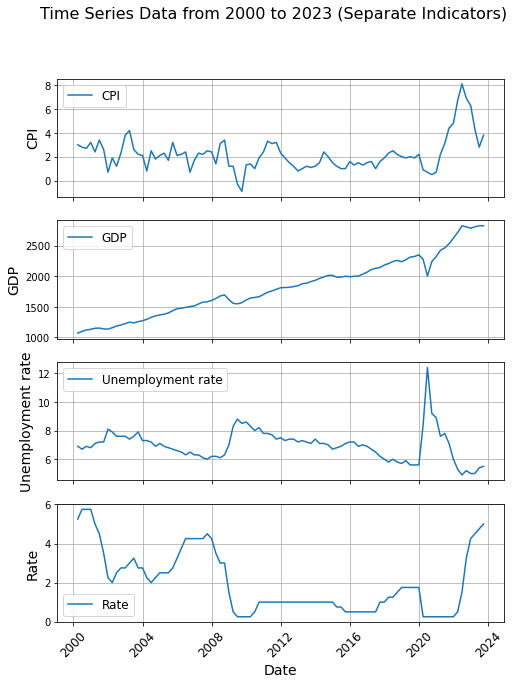

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True)

# Plotting each variable in a separate subplot
for i, column in enumerate(df_concatenated.columns):
    axes[i].plot(df_concatenated.index, df_concatenated[column], label=column)
    axes[i].set_ylabel(column, fontsize=14)
    axes[i].legend(fontsize=12)
    axes[i].grid(True)

# Setting common x-axis label
plt.xlabel('Date', fontsize=14)
fig.suptitle('Time Series Data from 2000 to 2023 (Separate Indicators)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [15]:
# # FD not include int rate
# data = np.log(df_concatenated[['CPI','GDP','Unemployment rate']]).diff()
# data = pd.concat([data,fed_df],axis=1).dropna()
# data

# FD include int rate
# data = df_concatenated.diff()
# data = data.dropna()
# data
data = np.log(df_concatenated).diff()
data = data.dropna()
data

<ipython-input-15-f25d6266c33c>:10: RuntimeWarning: invalid value encountered in log
  data = np.log(df_concatenated).diff()


,CPI,GDP,Unemployment rate,Rate
Date,,,,
2000-06-30,-0.068993,0.026974,-0.029414,0.090972
2000-09-30,-0.036368,0.020098,0.029414,0.000000
2000-12-31,0.169899,0.009857,-0.014599,0.000000
2001-03-31,-0.287682,0.014933,0.043172,-0.139762
2001-06-30,0.348307,0.002550,0.013986,-0.105361
...,...,...,...,...
2022-09-30,-0.160343,-0.006407,0.059423,0.773190
2022-12-31,-0.090972,-0.007566,-0.039221,0.268264
2023-03-31,-0.381935,0.007746,0.000000,0.057158


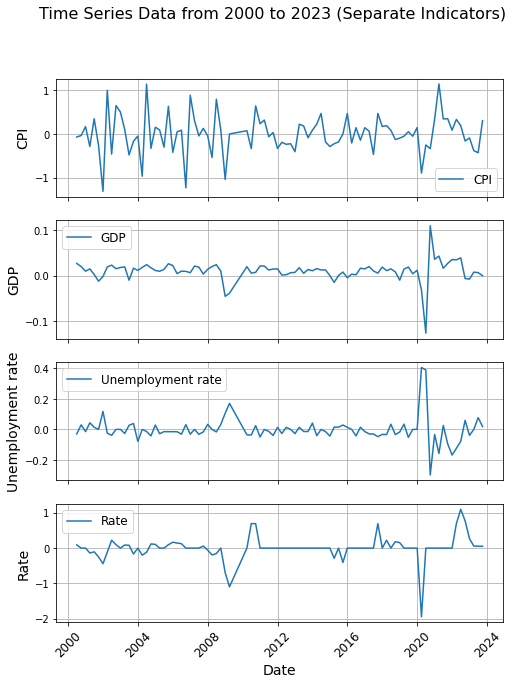

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True)

# Plotting each variable in a separate subplot
for i, column in enumerate(data.columns):
    axes[i].plot(data.index, data[column], label=column)
    axes[i].set_ylabel(column, fontsize=14)
    axes[i].legend(fontsize=12)
    axes[i].grid(True)

# Setting common x-axis label
plt.xlabel('Date', fontsize=14)
fig.suptitle('Time Series Data from 2000 to 2023 (Separate Indicators)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [17]:
cointegration_test(df_concatenated)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CPI    ::  58.79     > 40.1749   =>   True
GDP    ::  28.08     > 24.2761   =>   True
Unemployment rate ::  14.07     > 12.3212   =>   True
Rate   ::  5.46      > 4.1296    =>   True


In [18]:
cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CPI    ::  100.34    > 40.1749   =>   True
GDP    ::  53.59     > 24.2761   =>   True
Unemployment rate ::  20.44     > 12.3212   =>   True
Rate   ::  1.36      > 4.1296    =>   False


In [19]:
for name, column in df_concatenated.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2558
 No. Lags Chosen       = 8
 Critical value 1%     = -3.509
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.9315. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5678
 No. Lags Chosen       = 0
 Critical value 1%     = -3.502
 Critical value 5%     = -2.893
 Critical value 10%    = -2.583
 => P-Value = 0.9868. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Unemployment rate" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [20]:
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9793
 No. Lags Chosen       = 7
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1092
 No. Lags Chosen       = 0
 Critical value 1%     = -3.505
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unemployment rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

In [59]:
model = VAR(data)
for i in range(1,8):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -18.221020796425286
BIC :  -17.665507536351893
FPE :  1.2215469453554124e-08
HQIC:  -17.99700519624767 

Lag Order = 2
AIC :  -18.39037277576015
BIC :  -17.3837333453067
FPE :  1.033635893507602e-08
HQIC:  -17.984625309150832 

Lag Order = 3
AIC :  -18.28371621296595
BIC :  -16.81983536804701
FPE :  1.156821273707893e-08
HQIC:  -17.693955366425804 

Lag Order = 4
AIC :  -18.49856695688905
BIC :  -16.571190496331443
FPE :  9.441011431834741e-09
HQIC:  -17.722471889794964 

Lag Order = 5
AIC :  -18.321859686236817
BIC :  -15.924590234082228
FPE :  1.1492378044344828e-08
HQIC:  -17.35706979451833 

Lag Order = 6
AIC :  -18.32044203078124
BIC :  -15.446734670204396
FPE :  1.1874887117441326e-08
HQIC:  -17.16455655296192 

Lag Order = 7
AIC :  -18.37859065100238
BIC :  -15.021748404980663
FPE :  1.1739849066350512e-08
HQIC:  -17.029168323864354 



E:\ANACONDA64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
model = VAR(data)
results = model.fit(maxlags=6, ic='aic')

E:\ANACONDA64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Nov, 2023
Time:                     00:23:18
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.5712
Nobs:                     87.0000    HQIC:                  -17.7225
Log likelihood:           378.897    FPE:                9.44101e-09
AIC:                     -18.4986    Det(Omega_mle):     4.62341e-09
--------------------------------------------------------------------
Results for equation CPI
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.038493         0.099961           -0.385           0.700
L1.CPI                      -0.440608         0.131245           -3.357           0.001
L1.GDP                      13.331

In [62]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(results.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))
    
# No significant serial correlation in the error terms

CPI : 2.12
GDP : 2.05
Unemployment rate : 2.05
Rate : 2.03


In [63]:
# Construct fcst input
var_list = data.columns.tolist()
var_list


['CPI', 'GDP', 'Unemployment rate', 'Rate']

In [87]:
# Construct fcst input 23Q4- 24Q3
# Q4_23 = [2.8,-0.5,5.9,5]
# Q1_24 = [2.7,0.3,6.5,5]
# Q2_24 = [2.2,1.4,6.6,5]
# Q3_24 = [1.4,2,6.5,4.5]

Q4_23 = [2.8,-0.5,3.05,0]
Q1_24 = [2.7,0.3,4.21,0]
Q2_24 = [2.2,1.4,0.66,0]
Q3_24 = [1.4,2,-0.66,-0.5]

Q4_23_percent = [x / 100 for x in Q4_23]
Q1_24_percent = [x / 100 for x in Q1_24]
Q2_24_percent = [x / 100 for x in Q2_24]
Q3_24_percent = [x / 100 for x in Q3_24]


fcst_input =np.array([Q4_23_percent,Q1_24_percent,Q2_24_percent,Q3_24_percent])
fcst_input

array([[ 0.028 , -0.005 ,  0.0305,  0.    ],
       [ 0.027 ,  0.003 ,  0.0421,  0.    ],
       [ 0.022 ,  0.014 ,  0.0066,  0.    ],
       [ 0.014 ,  0.02  , -0.0066, -0.005 ]])

In [88]:
fcst_input_df = pd.DataFrame(fcst_input, columns=var_list)

fcst_input_quarters = ['23Q4', '24Q1', '24Q2', '24Q3']
fcst_input_df.index = fcst_input_quarters
fcst_input_df

,CPI,GDP,Unemployment rate,Rate
23Q4,0.028,-0.005,0.0305,0.000
24Q1,0.027,0.003,0.0421,0.000
24Q2,0.022,0.014,0.0066,0.000
24Q3,0.014,0.020,-0.0066,-0.005


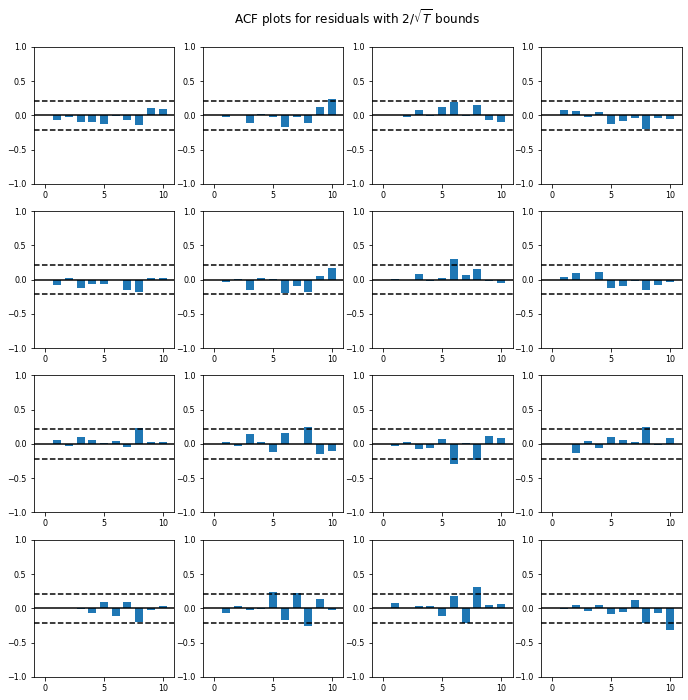

In [89]:
res_autocorr=results.plot_acorr()

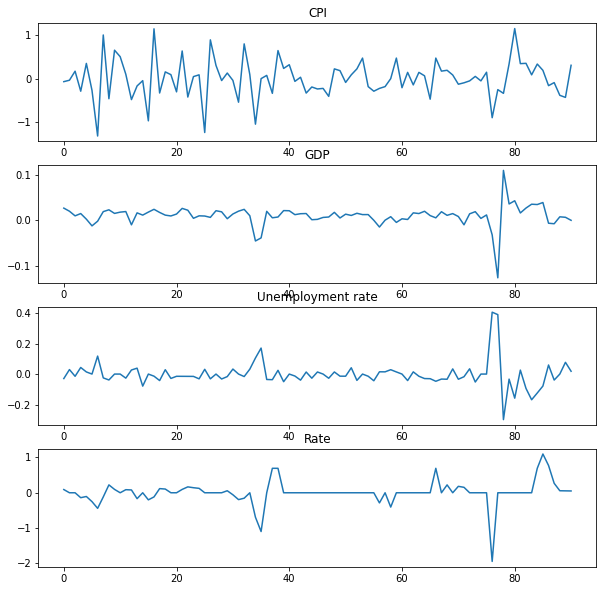

In [90]:
res_plot = results.plot()

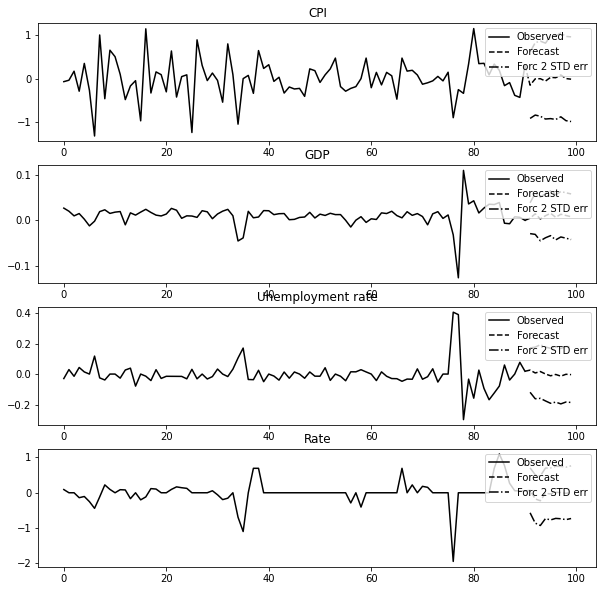

In [91]:
lag_order = results.k_ar
res_fcst_data=results.forecast(fcst_input, 9)
res_fcst_plot= results.plot_forecast(9)

In [92]:
res_fcst_data

array([[ 0.20352079,  0.01350156, -0.01722463,  0.09327092],
       [-0.0720694 ,  0.0158754 , -0.01955339, -0.03391938],
       [-0.0083151 ,  0.00739819,  0.0059207 , -0.10179519],
       [-0.02114651,  0.0096155 , -0.00630239, -0.06518162],
       [-0.073242  ,  0.0101926 , -0.00237976,  0.01297569],
       [ 0.04846384,  0.01036099, -0.0067179 ,  0.03328676],
       [ 0.02777758,  0.01003672, -0.00435511,  0.02442482],
       [ 0.01882277,  0.01011802, -0.00255682,  0.00737212],
       [ 0.00926285,  0.00923989, -0.0007947 , -0.00531566]])

In [93]:
fcst_df = pd.DataFrame(res_fcst_data, columns=var_list)
quarters = ['24Q4', '25Q1', '25Q2', '25Q3', '25Q4', '26Q1', '26Q2', '26Q3', '26Q4']
fcst_df.index = quarters
fcst_df

,CPI,GDP,Unemployment rate,Rate
24Q4,0.203521,0.013502,-0.017225,0.093271
25Q1,-0.072069,0.015875,-0.019553,-0.033919
25Q2,-0.008315,0.007398,0.005921,-0.101795
25Q3,-0.021147,0.009616,-0.006302,-0.065182
25Q4,-0.073242,0.010193,-0.002380,0.012976
26Q1,0.048464,0.010361,-0.006718,0.033287
26Q2,0.027778,0.010037,-0.004355,0.024425
26Q3,0.018823,0.010118,-0.002557,0.007372
26Q4,0.009263,0.009240,-0.000795,-0.005316


In [94]:
fcst_df

,CPI,GDP,Unemployment rate,Rate
24Q4,0.203521,0.013502,-0.017225,0.093271
25Q1,-0.072069,0.015875,-0.019553,-0.033919
25Q2,-0.008315,0.007398,0.005921,-0.101795
25Q3,-0.021147,0.009616,-0.006302,-0.065182
25Q4,-0.073242,0.010193,-0.002380,0.012976
26Q1,0.048464,0.010361,-0.006718,0.033287
26Q2,0.027778,0.010037,-0.004355,0.024425
26Q3,0.018823,0.010118,-0.002557,0.007372
26Q4,0.009263,0.009240,-0.000795,-0.005316


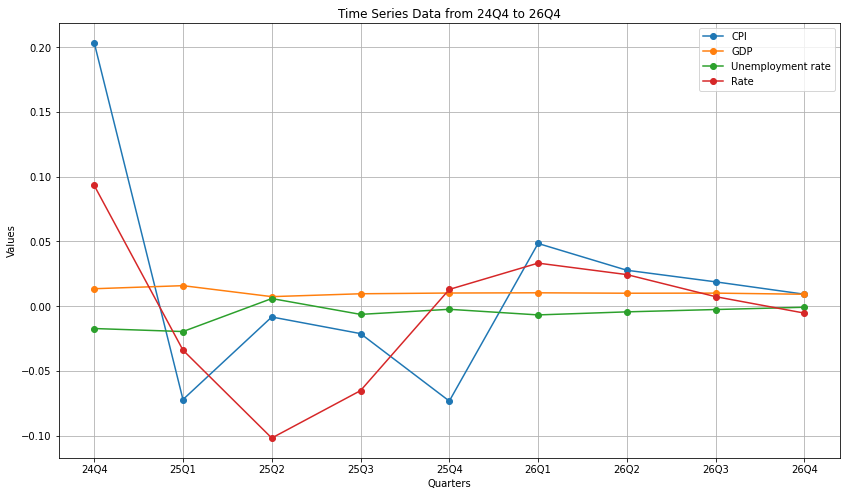

In [95]:
# quarters = ['24Q4', '25Q1', '25Q2', '25Q3', '25Q4', '26Q1', '26Q2', '26Q3', '26Q4']
# fcst_df.index = quarters

plt.figure(figsize=(14, 8))

for column in fcst_df.columns:
    plt.plot(fcst_df.index, fcst_df[column], marker='o', label=column)

plt.xlabel('Quarters')
plt.ylabel('Values')
plt.title('Time Series Data from 24Q4 to 26Q4')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# full_df = pd.concat([fcst_input_df, fcst_df])

# plt.figure(figsize=(14, 8))

# for column in full_df.columns:
#     plt.plot(full_df.index[:4], full_df[column][:4], marker='o', label=f"{column} (Input)")
#     plt.plot(full_df.index[4:], full_df[column][4:], marker='o', linestyle='dashed', label=f"{column} (Output)")

# plt.xlabel('Quarters')
# plt.ylabel('Values')
# plt.title('Time Series Data with Forecast Input and Output')
# plt.legend()
# plt.grid(True)
# plt.xticks(full_df.index, rotation=45)  # Rotate x-axis labels for better readability
# plt.show()

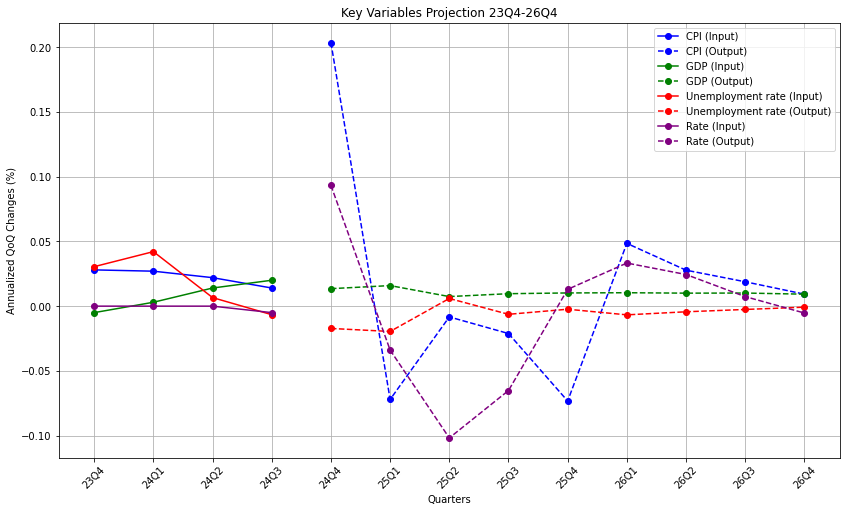

In [97]:
full_df = pd.concat([fcst_input_df, fcst_df])
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(14, 8))

for idx, column in enumerate(full_df.columns):
    color = colors[idx]
    # Plotting the forecast input with solid lines
    plt.plot(full_df.index[:4], full_df[column][:4], marker='o', color=color, label=f"{column} (Input)")
    # Plotting the forecast output with dashed lines
    plt.plot(full_df.index[4:], full_df[column][4:], marker='o', linestyle='dashed', color=color, label=f"{column} (Output)")

plt.xlabel('Quarters')
plt.ylabel('Annualized QoQ Changes (%)')
plt.title('Key Variables Projection 23Q4-26Q4')
plt.legend()
plt.grid(True)
plt.xticks(full_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [40]:
full_df

,CPI,GDP,Unemployment rate,Rate
23Q4,0.028000,-0.005000,0.059000,0.050000
24Q1,0.027000,0.003000,0.065000,0.050000
24Q2,0.022000,0.014000,0.066000,0.050000
24Q3,0.014000,0.020000,0.065000,0.045000
24Q4,0.177973,0.014668,-0.036689,0.036613
25Q1,-0.186825,0.021638,-0.033018,-0.255375
25Q2,0.007500,0.012917,0.007628,-0.343943
25Q3,-0.099850,0.006678,0.001197,-0.211143
25Q4,-0.031320,0.006584,0.005471,0.021819
26Q1,0.084839,0.014413,-0.019178,0.020439


In [41]:
# data.values[-lag_order:]

In [42]:
irf = results.irf(12)

In [39]:
results.fevd()

In [44]:
# irf_nochol=irf.plot(orth=False)

In [ ]:
#  using the Cholesky decomposition of the estimated error covariance matrix
irf_plot = irf.plot(orth=True)

In [ ]:
irf_rate = irf.plot(impulse='Rate',orth=True)

In [ ]:
irf_rate = irf.plot(impulse='Rate',orth=False)